In [30]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.cloud import bigquery
import os
#import google.auth

#credentials, project = google.auth.default(scopes=['https://www.googleapis.com/auth/cloud-platform'])

import google.oauth2.credentials

credentials = google.oauth2.credentials.Credentials(
    'access_token',
    refresh_token='refresh_token',
    token_uri='token_uri',
    client_id='client_id',
    client_secret='client_secret')

In [3]:
# Crea un objeto Client de BigQuery
client = bigquery.Client(credentials=credentials, project="gnomad-382415")

# Escribe tu consulta SQL en una cadena de texto
query = """
SELECT reference_name AS CHROM,
      start_position AS START_POS,
      end_position AS END_POS,
      names AS dbSNP,
      reference_bases AS REF,
      alternate_bases.alt AS ALT,
      alternate_bases.AC AS AC,
      alternate_bases.AF AS AF,
      alternate_bases.nhomalt_raw	AS NHOMALT,
      alternate_bases.allele_type AS TYPE,
      vep.CANONICAL AS CANONICAL,
      vep.Consequence AS Consequence,
      vep.IMPACT AS Impact,
      vep.SYMBOL AS Symbol,
      vep.Gene AS Gene,
      vep.EXON AS EXON,
      vep.INTRON AS INTRON,
      vep.STRAND AS STRAND,
      vep.HGVSc AS HGVSc,
      vep.HGVSp AS HGVSp,
      vep.MOTIF_NAME AS MOTIF,
      vep.CLIN_SIG AS CLIN_SIG,
      alternate_bases.popmax AS popmax,
      alternate_bases.AF_popmax	AS AF_popmax,
      alternate_bases.AF_nfe AS AF_nfe,
      alternate_bases.AF_fin AS AF_fin,
      alternate_bases.AF_nfe_est AS AF_est,
      alternate_bases.AF_nfe_nwe AS AF_nwe,
      alternate_bases.AF_nfe_seu AS AF_seu,
      alternate_bases.AF_nfe_onf AS AF_onf,
      alternate_bases.AF_amr	AS AF_amr,
      alternate_bases.AF_afr AS AF_afr,
      alternate_bases.AF_eas AS AF_eas,
      alternate_bases.AF_asj AS AF_asj,
      alternate_bases.AF_oth AS AF_oth,
      alternate_bases.AF_male AS AF_male,
      alternate_bases.AF_female AS AF_female,
FROM `bigquery-public-data.gnomAD.v2_1_1_genomes__chr1`AS main_table,
    main_table.alternate_bases AS alternate_bases,
    alternate_bases.vep AS vep
WHERE CANONICAL = "YES" AND Symbol IS NOT NULL
"""

# Ejecuta tu consulta con el método query()
results = client.query(query)

KeyboardInterrupt: 

In [ ]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')

In [ ]:
RetDisorder_panel = pd.read_csv("Retinal_disorders.tsv", sep="\t")
RetDisorder_panel.head()

,Entity Name,Entity type,Gene Symbol,Sources(; separated),Level4,Level3,Level2,Model_Of_Inheritance,Phenotypes,Omim,Orphanet,HPO,Publications,Description,Flagged,GEL_Status,UserRatings_Green_amber_red,version,ready,Mode of pathogenicity,EnsemblId(GRch37),EnsemblId(GRch38),HGNC,Position Chromosome,Position GRCh37 Start,Position GRCh37 End,Position GRCh38 Start,Position GRCh38 End,STR Repeated Sequence,STR Normal Repeats,STR Pathogenic Repeats,Region Haploinsufficiency Score,Region Triplosensitivity Score,Region Required Overlap Percentage,Region Variant Type,Region Verbose Name
0,ABCA4,gene,ABCA4,NHS GMS;Expert Review Green,Retinal disorders,NaN,NaN,"BIALLELIC, autosomal or pseudoautosomal","Achromatopsia, Cone, and Cone-rod Dystrophy;Ma...",601691.0,NaN,NaN,NaN,NaN,NaN,3,NaN,4.0,NaN,NaN,ENSG00000198691,ENSG00000198691,HGNC:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABCC6,gene,ABCC6,Expert Review Green;NHS GMS;RetNet,Retinal disorders,NaN,NaN,"BIALLELIC, autosomal or pseudoautosomal","Pseudoxanthoma elasticum, OMIM:264800;inherite...",603234.0,NaN,NaN,NaN,NaN,NaN,3,NaN,4.0,NaN,NaN,ENSG00000091262,ENSG00000091262,HGNC:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABHD12,gene,ABHD12,NHS GMS;Expert Review Green,Retinal disorders,NaN,NaN,"BIALLELIC, autosomal or pseudoautosomal","Eye Disorders;Polyneuropathy, Hearing Loss, At...",613599.0,NaN,NaN,NaN,NaN,NaN,3,NaN,4.0,NaN,NaN,ENSG00000100997,ENSG00000100997,HGNC:15868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACBD5,gene,ACBD5,Expert Review Green;NHS GMS,Retinal disorders,NaN,NaN,"BIALLELIC, autosomal or pseudoautosomal","Retinal dystrophy with leukodystrophy, OMIM:61...",616618.0,NaN,NaN,27799409;23105016;33427402,NaN,NaN,3,NaN,4.0,NaN,NaN,ENSG00000107897,ENSG00000107897,HGNC:23338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACO2,gene,ACO2,NHS GMS;Expert Review Green,Retinal disorders,NaN,NaN,"BOTH monoallelic and biallelic, autosomal or p...","Infantile cerebellar-retinal degeneration, 614559",100850.0,NaN,NaN,34056600,NaN,NaN,3,NaN,4.0,NaN,NaN,ENSG00000100412,ENSG00000100412,HGNC:118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
RetDisorder_panel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity Name                         413 non-null    object 
 1   Entity type                         413 non-null    object 
 2   Gene Symbol                         413 non-null    object 
 3   Sources(; separated)                413 non-null    object 
 4   Level4                              413 non-null    object 
 5   Level3                              0 non-null      float64
 6   Level2                              0 non-null      float64
 7   Model_Of_Inheritance                325 non-null    object 
 8   Phenotypes                          379 non-null    object 
 9   Omim                                403 non-null    float64
 10  Orphanet                            0 non-null      float64
 11  HPO                                 0 non-nul

In [ ]:
RetDisorder_panel_dropna = RetDisorder_panel.dropna(thresh=len(RetDisorder_panel)*0.5, axis=1)
RetDisorder_panel_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity Name           413 non-null    object 
 1   Entity type           413 non-null    object 
 2   Gene Symbol           413 non-null    object 
 3   Sources(; separated)  413 non-null    object 
 4   Level4                413 non-null    object 
 5   Model_Of_Inheritance  325 non-null    object 
 6   Phenotypes            379 non-null    object 
 7   Omim                  403 non-null    float64
 8   GEL_Status            413 non-null    int64  
 9   version               413 non-null    float64
 10  EnsemblId(GRch37)     412 non-null    object 
 11  EnsemblId(GRch38)     412 non-null    object 
 12  HGNC                  413 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.1+ KB


In [ ]:
#pd.set_option('display.max_rows', None)
gnomad_columns = pd.read_csv("Gnomad_columns.csv")
gnomad_columns

,column_name,field_path,description
0,reference_name,reference_name,Reference name.
1,start_position,start_position,Start position (0-based). Corresponds to the f...
2,end_position,end_position,End position (0-based). Corresponds to the fir...
3,reference_bases,reference_bases,Reference bases.
4,alternate_bases,alternate_bases,One record for each alternate base (if any).
...,...,...,...
644,non_neuro_AN_nfe_seu,non_neuro_AN_nfe_seu,Total number of alleles in samples of Southern...
645,non_topmed_AN_afr_female,non_topmed_AN_afr_female,Total number of alleles in female samples of A...
646,non_topmed_AN_afr,non_topmed_AN_afr,Total number of alleles in samples of African-...
647,controls_AN,controls_AN,Total number of alleles in samples in the cont...


In [ ]:
gnomad_chr1 = pd.read_csv("Gnomad_ex_chr1.csv")
gnomad_chr1

,CHROM,START_POS,END_POS,dbSNP,REF,ALT,AC,AF,NHOMALT,TYPE,CANONICAL,Consequence,Impact,Symbol,Gene,EXON,INTRON,STRAND,HGVSc,HGVSp,MOTIF,CLIN_SIG,popmax,AF_popmax,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female
0,1,225840363,225840365,[rs1210648338],GC,G,0,0.000000,3,del,YES,intron_variant,MODIFIER,ENAH,ENSG00000154380,NaN,1/14,-1,ENST00000366844.3:c.5+23delG,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,225840370,225840371,[rs1000225632],C,T,0,0.000000,2,snv,YES,intron_variant,MODIFIER,ENAH,ENSG00000154380,NaN,1/14,-1,ENST00000366844.3:c.5+17G>A,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,1,225840413,225840415,[rs906138142],TC,T,0,0.000000,1,del,YES,5_prime_UTR_variant,MODIFIER,ENAH,ENSG00000154380,1/15,NaN,-1,ENST00000366844.3:c.-23delG,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,1,201618600,201618601,[rs746176781],C,T,0,0.000000,0,snv,YES,intron_variant,MODIFIER,NAV1,ENSG00000134369,NaN,1/29,1,ENST00000367296.4:c.757+48C>T,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,1,201617730,201617731,[rs1457151986],C,T,0,0.000000,2,snv,YES,5_prime_UTR_variant,MODIFIER,NAV1,ENSG00000134369,1/30,NaN,1,ENST00000367296.4:c.-66C>T,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,1,121129733,121129734,[],T,G,1,0.000004,0,snv,YES,intron_variant&non_coding_transcript_variant,MODIFIER,RP11-343N15.1,ENSG00000230806,NaN,2/3,-1,ENST00000437515.1:n.329+9607A>C,NaN,NaN,NaN,eas,0.000061,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000061,0.0,0.0,0.000000,0.000010
13768,1,121128428,121128429,[],G,T,1,0.000962,0,snv,YES,intron_variant&non_coding_transcript_variant,MODIFIER,RP11-343N15.1,ENSG00000230806,NaN,2/3,-1,ENST00000437515.1:n.329+10912C>A,NaN,NaN,NaN,eas,0.026316,0.0,NaN,NaN,0.0,NaN,0.0,0.00000,0.0,0.026316,0.0,0.0,0.001520,0.000000
13769,1,121129517,121129518,[rs587619476],C,T,2,0.000014,0,snv,YES,intron_variant&non_coding_transcript_variant,MODIFIER,RP11-343N15.1,ENSG00000230806,NaN,2/3,-1,ENST00000437515.1:n.329+9823G>A,NaN,NaN,NaN,eas,0.000183,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000183,0.0,0.0,0.000000,0.000030
13770,1,121129627,121129628,[],T,G,2,0.000010,0,snv,YES,intron_variant&non_coding_transcript_variant,MODIFIER,RP11-343N15.1,ENSG00000230806,NaN,2/3,-1,ENST00000437515.1:n.329+9713A>C,NaN,NaN,NaN,eas,0.000139,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000139,0.0,0.0,0.000019,0.000000


In [ ]:
gnomad_chr1['RetinaDisorder'] = gnomad_chr1['Symbol'].isin(RetDisorder_panel['Gene Symbol'])
gnomad_retina = gnomad_chr1[gnomad_chr1['RetinaDisorder']==True]
gnomad_not_retina = gnomad_chr1[gnomad_chr1['RetinaDisorder']==False]

<Figure size 1200x800 with 0 Axes>

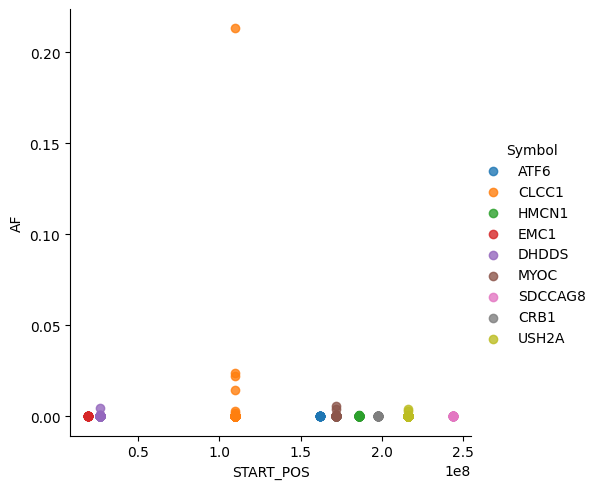

In [ ]:
plt.figure(figsize=(12,8))
sns.lmplot(x="START_POS", y="AF", data=gnomad_retina, fit_reg=False, hue='Symbol', legend=True)

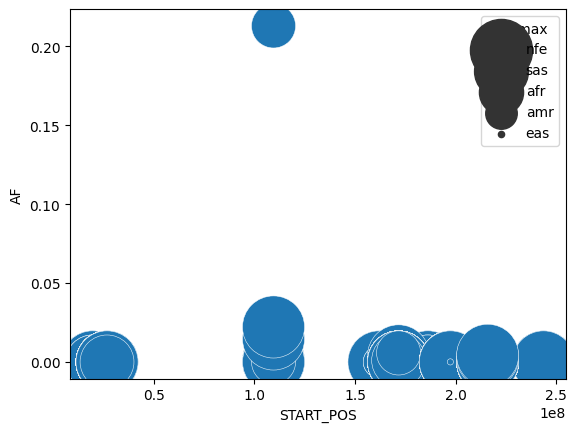

In [ ]:
sns.scatterplot(data=gnomad_retina, x="START_POS", y="AF", size="popmax", legend=True, sizes=(20, 2000));

In [ ]:
gnomad_retina.shape
gnomad_retina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 226 to 13710
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CHROM           831 non-null    int64  
 1   START_POS       831 non-null    int64  
 2   END_POS         831 non-null    int64  
 3   dbSNP           831 non-null    object 
 4   REF             831 non-null    object 
 5   ALT             831 non-null    object 
 6   AC              831 non-null    int64  
 7   AF              831 non-null    float64
 8   NHOMALT         831 non-null    int64  
 9   TYPE            831 non-null    object 
 10  CANONICAL       831 non-null    object 
 11  Consequence     831 non-null    object 
 12  Impact          831 non-null    object 
 13  Symbol          831 non-null    object 
 14  Gene            831 non-null    object 
 15  EXON            581 non-null    object 
 16  INTRON          250 non-null    object 
 17  STRAND          831 non-null    int6

In [ ]:
gnomad_retina["Symbol"].unique()

array(['ATF6', 'CLCC1', 'HMCN1', 'EMC1', 'DHDDS', 'MYOC', 'SDCCAG8',
       'CRB1', 'USH2A'], dtype=object)

In [ ]:
# Calcular la fracción de valores no-nulos en cada columna
frac_non_null = gnomad_retina.notnull().sum() / len(gnomad_retina)

# Seleccionar las columnas con menos del 50% de valores faltantes
columns_to_keep = frac_non_null[frac_non_null >= 0.5].index

# Eliminar las columnas con más del 50% de valores faltantes
gnomad_retina_values = gnomad_retina[columns_to_keep]

In [ ]:
gnomad_retina_values

,CHROM,START_POS,END_POS,dbSNP,REF,ALT,AC,AF,NHOMALT,TYPE,CANONICAL,Consequence,Impact,Symbol,Gene,EXON,STRAND,HGVSc,HGVSp,popmax,AF_popmax,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,RetinaDisorder
226,1,161882061,161882062,[rs1192481020],C,T,0,0.000000,0,snv,YES,intron_variant,MODIFIER,ATF6,ENSG00000118217,NaN,1,ENST00000367942.3:c.1720-24C>T,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
227,1,161882185,161882186,[rs1195076312],G,A,0,0.000000,0,snv,YES,intron_variant,MODIFIER,ATF6,ENSG00000118217,NaN,1,ENST00000367942.3:c.1804+16G>A,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
228,1,161882075,161882076,[rs1044236857],T,A,1,0.000004,0,snv,YES,intron_variant,MODIFIER,ATF6,ENSG00000118217,NaN,1,ENST00000367942.3:c.1720-10T>A,NaN,nfe,0.000009,0.000009,0.000000,0.000000,0.000000,0.000000,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000,True
229,1,161882210,161882211,[rs749010430],T,C,1,0.000005,0,snv,YES,intron_variant,MODIFIER,ATF6,ENSG00000118217,NaN,1,ENST00000367942.3:c.1804+41T>C,NaN,sas,0.000043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,True
230,1,161882189,161882190,[rs367593190],T,C,1,0.000004,0,snv,YES,intron_variant,MODIFIER,ATF6,ENSG00000118217,NaN,1,ENST00000367942.3:c.1804+20T>C,NaN,afr,0.000065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,0.000009,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13706,1,215847392,215847393,[rs1174673381],A,G,1,0.000004,0,snv,YES,intron_variant,MODIFIER,USH2A,ENSG00000042781,NaN,-1,ENST00000307340.3:c.13811+49T>C,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000164,0.000000,0.000009,True
13707,1,215844392,215844393,[rs188674785],T,A,6,0.000024,0,snv,YES,missense_variant,MODERATE,USH2A,ENSG00000042781,64/72,-1,ENST00000307340.3:c.14054A>T,ENSP00000305941.3:p.Asn4685Ile,amr,0.000087,0.000018,0.000000,0.000000,0.000000,0.000087,0.000032,0.000087,0.000000,0.000000,0.000000,0.000163,0.000007,0.000043,True
13708,1,215821939,215821940,[rs533097255],C,T,46,0.000183,1,snv,YES,missense_variant,MODERATE,USH2A,ENSG00000042781,66/72,-1,ENST00000307340.3:c.14512G>A,ENSP00000305941.3:p.Gly4838Arg,sas,0.001404,0.000009,0.000000,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000099,0.000163,0.000199,0.000165,True
13709,1,215853691,215853692,[rs55921307],G,A,761,0.003038,3,snv,YES,synonymous_variant,LOW,USH2A,ENSG00000042781,62/72,-1,ENST00000307340.3:c.12093C>T,ENST00000307340.3:c.12093C>T(p.%3D),nfe,0.004612,0.004612,0.000832,0.008264,0.003997,0.006817,0.005178,0.003501,0.000371,0.000054,0.004472,0.004418,0.003073,0.002996,True


In [6]:
lovd_crb1 = pd.read_csv("LOVD_CRB1_variants.txt", sep='\t', quotechar='"')
lovd_crb1

,{{id}},{{allele}},{{effectid}},{{chromosome}},{{position_g_start}},{{position_g_end}},{{type}},{{average_frequency}},"{{owned_by}}""{{VariantOnGenome/DBID}}",{{VariantOnGenome/DNA}},...,{{VariantOnGenome/Genetic_origin}},{{VariantOnGenome/Segregation}},{{VariantOnGenome/dbSNP}},{{VariantOnGenome/VIP}},{{VariantOnGenome/Methylation}},{{VariantOnGenome/ISCN}},{{VariantOnGenome/DNA/hg38}},{{VariantOnGenome/ClinVar}},{{VariantOnGenome/ClinicalClassification}},{{VariantOnGenome/ClinicalClassification/Method}}
36423,3,70,1,197398734,197398767,del,0.000000,552,CRB1_000039,g.197398734_197398767del,...,Germline,NaN,NaN,0.0,NaN,NaN,g.197429604_197429637del,NaN,likely pathogenic,NaN
59783,0,70,1,197403836,197403836,subst,0.000212,6,CRB1_000001,g.197403836G>A,...,Germline,NaN,NaN,0.0,NaN,NaN,g.197434706G>A,NaN,likely pathogenic,NaN
59784,2,70,1,197403836,197403836,subst,0.000212,6,CRB1_000001,g.197403836G>A,...,Germline,NaN,NaN,0.0,NaN,NaN,g.197434706G>A,NaN,likely pathogenic,NaN
59785,1,70,1,197403836,197403836,subst,0.000212,6,CRB1_000001,g.197403836G>A,...,Germline,NaN,NaN,0.0,NaN,NaN,g.197434706G>A,NaN,likely pathogenic,NaN
59786,1,70,1,197403836,197403836,subst,0.000212,6,CRB1_000001,g.197403836G>A,...,Germline,NaN,NaN,0.0,NaN,NaN,g.197434706G>A,NaN,likely pathogenic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905931,0,70,1,197390703,197390703,subst,0.000000,0,CRB1_000570,g.197390703T>C,...,Germline/De novo (untested),?,NaN,0.0,NaN,NaN,g.197421573T>C,NaN,likely pathogenic,ACMG
910889,0,30,1,197390491,197390491,subst,0.003326,2330,CRB1_000577,g.197390491C>T,...,CLASSIFICATION record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,likely benign,NaN
910890,0,70,1,197404292,197404292,subst,0.000004,2327,CRB1_000101,g.197404292T>C,...,CLASSIFICATION record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,likely pathogenic,NaN
910891,0,10,1,197412269,197412270,del,0.000000,2330,CRB1_000583,g.197412269_197412270del,...,CLASSIFICATION record,NaN,NaN,NaN,NaN,NaN,NaN,NaN,benign,NaN


# CRB1
## GnomAD

In [2]:
gnomad_crb1 = pd.read_json("Databases/Gnomad_crb1.json", lines = True)
gnomad_crb1.head()

,CHROM,START_POS,END_POS,dbSNP,REF,ALT,AC,AF,TYPE,CANONICAL,...,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON
0,1,197241517,197241518,[rs1335507706],G,C,1,0.000032,snv,YES,...,0.0,0.000000,0.0,0.000115,0.0,0.000000,0.0,0.000057,0.000000,NaN
1,1,197239998,197239999,[rs1318432555],C,T,1,0.000032,snv,YES,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN
2,1,197240222,197240225,[rs1383439447],GGA,G,1,0.000032,del,YES,...,0.0,0.000469,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN
3,1,197239286,197239287,[rs945705379],A,G,5,0.000159,snv,YES,...,0.0,0.000000,0.0,0.000229,0.0,0.006897,0.0,0.000286,0.000000,NaN
4,1,197241224,197241225,[rs1322562610],G,T,1,0.000032,snv,YES,...,0.0,0.000468,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000072,NaN


In [3]:
gnomad_crb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20355 entries, 0 to 20354
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CHROM        20355 non-null  int64  
 1   START_POS    20355 non-null  int64  
 2   END_POS      20355 non-null  int64  
 3   dbSNP        20355 non-null  object 
 4   REF          20355 non-null  object 
 5   ALT          20355 non-null  object 
 6   AC           20355 non-null  int64  
 7   AF           20355 non-null  float64
 8   TYPE         20355 non-null  object 
 9   CANONICAL    20355 non-null  object 
 10  Consequence  20355 non-null  object 
 11  Symbol       20355 non-null  object 
 12  INTRON       18216 non-null  object 
 13  HGVSc        18610 non-null  object 
 14  popmax       18987 non-null  object 
 15  AF_popmax    18987 non-null  float64
 16  AF_nfe       20355 non-null  float64
 17  AF_fin       20350 non-null  float64
 18  AF_est       20353 non-null  float64
 19  AF_n

In [4]:
pd.set_option('display.max_columns', None)
gnomad_crb1 = gnomad_crb1.explode('dbSNP')
gnomad_crb1[['Transcript ID', 'HGVSc']] = gnomad_crb1['HGVSc'].str.split(':', n=1, expand=True)

In [5]:
gnomad_crb1 = gnomad_crb1.dropna(subset=['HGVSc', 'popmax'])
#gnomad_crb1_filt= gnomad_crb1[(gnomad_crb1["Consequence"] != "intron_variant") & (gnomad_crb1["Consequence"] != "intron_variant&non_coding_transcript_variant")]
#gnomad_crb1_filt.info()
gnomad_crb1.head()

,CHROM,START_POS,END_POS,dbSNP,REF,ALT,AC,AF,TYPE,CANONICAL,Consequence,Symbol,INTRON,HGVSc,popmax,AF_popmax,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON,Transcript ID
0,1,197241517,197241518,rs1335507706,G,C,1,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+3906G>C,afr,0.000115,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000115,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3
1,1,197239998,197239999,rs1318432555,C,T,1,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+2387C>T,nfe,0.000065,0.000065,0.0,0.0,0.000116,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3
2,1,197240222,197240225,rs1383439447,GGA,G,1,0.000032,del,YES,intron_variant,CRB1,1/11,c.70+2613_70+2614delAG,nfe,0.000065,0.000065,0.0,0.0,0.000000,0.0,0.000469,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3
3,1,197239286,197239287,rs945705379,A,G,5,0.000159,snv,YES,intron_variant,CRB1,1/11,c.70+1675A>G,afr,0.000229,0.000065,0.0,0.0,0.000116,0.0,0.000000,0.0,0.000229,0.0,0.006897,0.0,0.000286,0.000000,NaN,ENST00000367400.3
4,1,197241224,197241225,rs1322562610,G,T,1,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+3613G>T,nfe,0.000065,0.000065,0.0,0.0,0.000000,0.0,0.000468,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000072,NaN,ENST00000367400.3


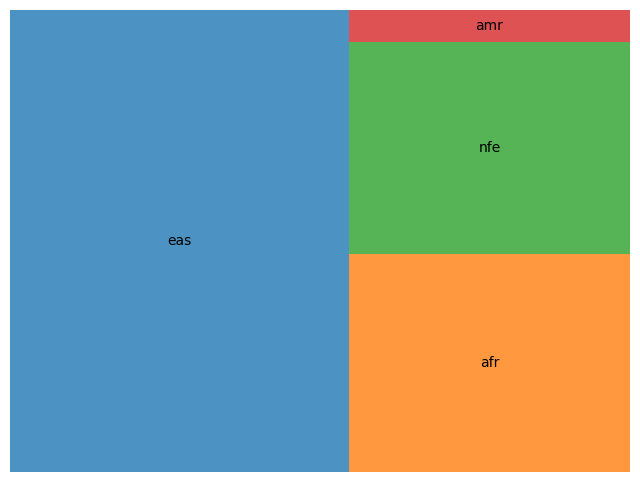

In [6]:
import squarify

data = gnomad_crb1.groupby("popmax").sum()['AC'].sort_values(ascending=False)

plt.figure(figsize=(8,6))
squarify.plot(sizes=data.values, label=data.index, alpha=.8, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.axis('off')
plt.show()

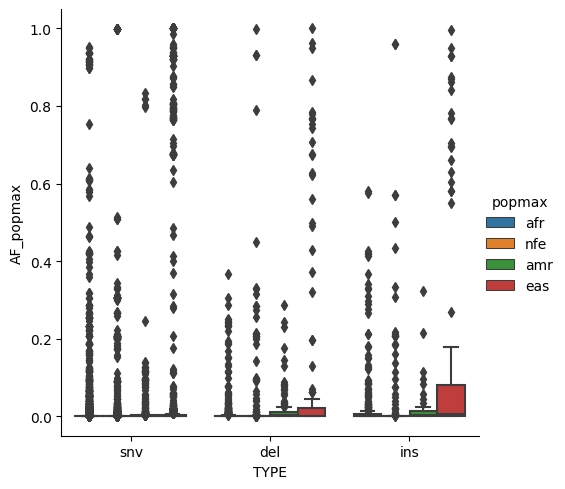

In [7]:
sns.catplot(x="TYPE", y="AF_popmax", hue="popmax", kind="box", data=gnomad_crb1);

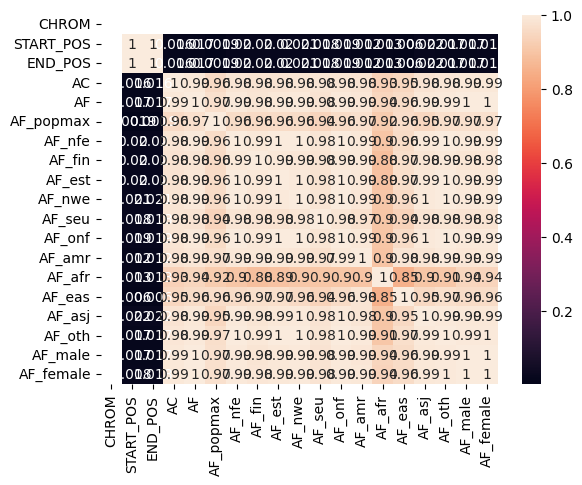

In [10]:
sns.heatmap(gnomad_crb1.corr(numeric_only=True), annot=True);
#sns.pairplot(gnomad_crb1)
#sns.plt.show()

# ClinVar

In [11]:
clinvar_crb1 = pd.read_csv("clinvar_result.txt", sep='\t')
clinvar_crb1.head(n=2)

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NM_201253.2(CRB1):c.-204C>T,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294665,1.0,197237339,1.0,197268209,294665,279527,rs544047392,NC_000001.11:197268208:C:T,NaN
1,NM_201253.2(CRB1):c.-195G>A,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294666,1.0,197237348,1.0,197268218,294666,278311,rs886045782,NC_000001.11:197268217:G:A,NaN


In [12]:
clinvar_crb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   1448 non-null   object 
 1   Gene(s)                                1448 non-null   object 
 2   Protein change                         806 non-null    object 
 3   Condition(s)                           1448 non-null   object 
 4   Clinical significance (Last reviewed)  1448 non-null   object 
 5   Review status                          1448 non-null   object 
 6   Accession                              1448 non-null   object 
 7   GRCh37Chromosome                       1446 non-null   float64
 8   GRCh37Location                         1446 non-null   object 
 9   GRCh38Chromosome                       1439 non-null   float64
 10  GRCh38Location                         1439 non-null   object 
 11  Vari

In [13]:
clinvar_crb1[['RefSeq', 'HGVSc']] = clinvar_crb1['Name'].str.split(':', n=1, expand=True)
clinvar_crb1[['HGVSc', 'HGVSp']] = clinvar_crb1['HGVSc'].str.split(pat=' ', n=1, expand=True)
clinvar_crb1[['START_POS', 'END_POS']] = clinvar_crb1['GRCh37Location'].str.split(pat=' - ', n=1, expand=True)
clinvar_crb1[['ClinSign', 'ClinReview']] = clinvar_crb1['Clinical significance (Last reviewed)'].str.split('(', n=1, expand=True)
clinvar_crb1.head(n=2)

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15,RefSeq,HGVSc,HGVSp,START_POS,END_POS,ClinSign,ClinReview
0,NM_201253.2(CRB1):c.-204C>T,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294665,1.0,197237339,1.0,197268209,294665,279527,rs544047392,NC_000001.11:197268208:C:T,NaN,NM_201253.2(CRB1),c.-204C>T,None,197237339,None,Uncertain significance,"Last reviewed: Jan 13, 2018)"
1,NM_201253.2(CRB1):c.-195G>A,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294666,1.0,197237348,1.0,197268218,294666,278311,rs886045782,NC_000001.11:197268217:G:A,NaN,NM_201253.2(CRB1),c.-195G>A,None,197237348,None,Uncertain significance,"Last reviewed: Jan 13, 2018)"


In [14]:
clinvar_crb1[['REF', 'ALT']] = clinvar_crb1['HGVSc'].str.split('>', n=1, expand=True)

In [15]:
clinvar_crb1.loc[clinvar_crb1['END_POS'].isnull(), 'END_POS'] = clinvar_crb1['START_POS']
clinvar_crb1 = clinvar_crb1[clinvar_crb1["Gene(s)"] == "CRB1"]

In [16]:
clinvar_crb1['RefSeq'].unique()

array(['NM_201253.2(CRB1)', 'NM_201253.3(CRB1)', 'NC_000001.10',
       'Single allele', 'CRB1, ALU INS, NT2320'], dtype=object)

In [17]:
clinvar_crb1['RefSeq'] = clinvar_crb1['RefSeq'].replace('NM_201253.2(CRB1)', 'NM_201253')
clinvar_crb1['RefSeq'] = clinvar_crb1['RefSeq'].replace('NM_201253.3(CRB1)', 'NM_201253')
clinvar_crb1 = clinvar_crb1.loc[clinvar_crb1['RefSeq'] == 'NM_201253']
clinvar_crb1

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15,RefSeq,HGVSc,HGVSp,START_POS,END_POS,ClinSign,ClinReview,REF,ALT
0,NM_201253.2(CRB1):c.-204C>T,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294665,1.0,197237339,1.0,197268209,294665,279527,rs544047392,NC_000001.11:197268208:C:T,NaN,NM_201253,c.-204C>T,None,197237339,197237339,Uncertain significance,"Last reviewed: Jan 13, 2018)",c.-204C,T
1,NM_201253.2(CRB1):c.-195G>A,CRB1,NaN,Retinitis pigmentosa|Pigmented paravenous reti...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000294666,1.0,197237348,1.0,197268218,294666,278311,rs886045782,NC_000001.11:197268217:G:A,NaN,NM_201253,c.-195G>A,None,197237348,197237348,Uncertain significance,"Last reviewed: Jan 13, 2018)",c.-195G,A
2,NM_201253.3(CRB1):c.-56C>G,CRB1,NaN,Retinitis pigmentosa|Leber congenital amaurosi...,"Uncertain significance(Last reviewed: Apr 27, ...","criteria provided, single submitter",VCV000874265,1.0,197237487,1.0,197268357,874265,863217,rs1654712316,NC_000001.11:197268356:C:G,NaN,NM_201253,c.-56C>G,None,197237487,197237487,Uncertain significance,"Last reviewed: Apr 27, 2017)",c.-56C,G
3,NM_201253.3(CRB1):c.-55C>T,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000875194,1.0,197237488,1.0,197268358,875194,863218,rs965921500,NC_000001.11:197268357:C:T,NaN,NM_201253,c.-55C>T,None,197237488,197237488,Uncertain significance,"Last reviewed: Jan 13, 2018)",c.-55C,T
4,NM_201253.3(CRB1):c.4G>A (p.Ala2Thr),CRB1,A2T,Leber congenital amaurosis 8|Retinitis pigment...,"Uncertain significance(Last reviewed: Jun 13, ...","criteria provided, single submitter",VCV001479173,1.0,197237546,1.0,197268416,1479173,1426544,NaN,NC_000001.11:197268415:G:A,NaN,NM_201253,c.4G>A,(p.Ala2Thr),197237546,197237546,Uncertain significance,"Last reviewed: Jun 13, 2022)",c.4G,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,NM_201253.3(CRB1):c.*289A>G,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"Uncertain significance(Last reviewed: Mar 2, 2...","criteria provided, single submitter",VCV000874626,1.0,197447298,1.0,197478168,874626,863235,rs780654592,NC_000001.11:197478167:A:G,NaN,NM_201253,c.*289A>G,None,197447298,197447298,Uncertain significance,"Last reviewed: Mar 2, 2018)",c.*289A,G
1435,NM_201253.3(CRB1):c.*324C>A,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"Uncertain significance(Last reviewed: Jan 13, ...","criteria provided, single submitter",VCV000874627,1.0,197447333,1.0,197478203,874627,863236,rs190166697,NC_000001.11:197478202:C:A,NaN,NM_201253,c.*324C>A,None,197447333,197447333,Uncertain significance,"Last reviewed: Jan 13, 2018)",c.*324C,A
1436,NM_201253.3(CRB1):c.*331_*337dup,CRB1,NaN,Leber congenital amaurosis|Pigmented paravenou...,"Uncertain significance(Last reviewed: Jun 14, ...","criteria provided, single submitter",VCV000294694,1.0,197447336 - 197447337,1.0,197478206 - 197478207,294694,279565,rs886045790,NC_000001.11:197478206:TTTTAGTTTT:TTTTAGTTTTTA...,NaN,NM_201253,c.*331_*337dup,None,197447336,197447337,Uncertain significance,"Last reviewed: Jun 14, 2016)",c.*331_*337dup,None
1437,NM_201253.3(CRB1):c.*393T>C,CRB1,NaN,Retinitis pigmentosa|Leber congenital amaurosi...,Conflicting interpretations of pathogenicity(L...,"criteria provided, conflicting interpretations",VCV000294695,1.0,197447402,1.0,197478272,294695,278358,rs147966959,NC_000001.11:197478271:T:C,NaN,NM_201253,c.*393T>C,None,197447402,197447402,Conflicting interpretations of pathogenicity,"Last reviewed: Jan 13, 2018)",c.*393T,C


In [18]:
ref_value = lambda x: x[-1]
clinvar_crb1['REF'] = clinvar_crb1['REF'].apply(ref_value)
clinvar_crb1 = clinvar_crb1.loc[clinvar_crb1['REF'] != '=']
clinvar_crb1 = clinvar_crb1.loc[clinvar_crb1['REF'] != 'p']
clinvar_crb1['REF'].unique()

array(['C', 'G', 'T', 'A'], dtype=object)

In [19]:
clinvar_crb1 = clinvar_crb1.drop(['GRCh38Chromosome', 'GRCh38Location', 'VariationID', 'AlleleID(s)', 'Canonical SPDI', 'Clinical significance (Last reviewed)', 'Unnamed: 15'], axis=1)

In [20]:
merged = pd.merge(gnomad_crb1, clinvar_crb1,
                  how='outer', on="HGVSc")
merged.head()

,CHROM,START_POS_x,END_POS_x,dbSNP,REF_x,ALT_x,AC,AF,TYPE,CANONICAL,Consequence,Symbol,INTRON,HGVSc,popmax,AF_popmax,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON,Transcript ID,Name,Gene(s),Protein change,Condition(s),Review status,Accession,GRCh37Chromosome,GRCh37Location,dbSNP ID,RefSeq,HGVSp,START_POS_y,END_POS_y,ClinSign,ClinReview,REF_y,ALT_y
0,1.0,197241517.0,197241518.0,rs1335507706,G,C,1.0,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+3906G>C,afr,0.000115,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000115,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,197239998.0,197239999.0,rs1318432555,C,T,1.0,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+2387C>T,nfe,0.000065,0.000065,0.0,0.0,0.000116,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,197240222.0,197240225.0,rs1383439447,GGA,G,1.0,0.000032,del,YES,intron_variant,CRB1,1/11,c.70+2613_70+2614delAG,nfe,0.000065,0.000065,0.0,0.0,0.000000,0.0,0.000469,0.0,0.000000,0.0,0.000000,0.0,0.000057,0.000000,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,197239286.0,197239287.0,rs945705379,A,G,5.0,0.000159,snv,YES,intron_variant,CRB1,1/11,c.70+1675A>G,afr,0.000229,0.000065,0.0,0.0,0.000116,0.0,0.000000,0.0,0.000229,0.0,0.006897,0.0,0.000286,0.000000,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,197241224.0,197241225.0,rs1322562610,G,T,1.0,0.000032,snv,YES,intron_variant,CRB1,1/11,c.70+3613G>T,nfe,0.000065,0.000065,0.0,0.0,0.000000,0.0,0.000468,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000072,NaN,ENST00000367400.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18534 entries, 0 to 18533
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             17351 non-null  float64
 1   START_POS_x       17351 non-null  float64
 2   END_POS_x         17351 non-null  float64
 3   dbSNP             17123 non-null  object 
 4   REF_x             17351 non-null  object 
 5   ALT_x             17351 non-null  object 
 6   AC                17351 non-null  float64
 7   AF                17351 non-null  float64
 8   TYPE              17351 non-null  object 
 9   CANONICAL         17351 non-null  object 
 10  Consequence       17351 non-null  object 
 11  Symbol            17351 non-null  object 
 12  INTRON            16982 non-null  object 
 13  HGVSc             18534 non-null  object 
 14  popmax            17351 non-null  object 
 15  AF_popmax         17351 non-null  float64
 16  AF_nfe            17351 non-null  float6

In [22]:
merged['CHROM'] = merged['CHROM'].fillna(1)
merged.filter(regex='^AF_', axis=1).fillna(0, inplace=True)
merged['Symbol'] = merged['Symbol'].fillna("CRB1")
merged['popmax'] = merged['popmax'].fillna("affected")
merged['RefSeq'] = merged['RefSeq'].fillna(method='bfill')
merged['Transcript ID'] = merged['Transcript ID'].fillna(method='ffill')
merged.loc[merged['START_POS_x'].isnull(), 'START_POS_x'] = merged['START_POS_y']
merged.loc[merged['END_POS_x'].isnull(), 'END_POS_x'] = merged['END_POS_y']
merged.loc[merged['dbSNP'].isnull(), 'dbSNP'] = merged['dbSNP ID']
merged.loc[merged['REF_x'].isnull(), 'REF_x'] = merged['REF_y']
merged.loc[merged['ALT_x'].isnull(), 'ALT_x'] = merged['ALT_y']
merged.loc[merged['AF'] > 0.01, 'ClinSign'] = merged.loc[merged['AF'] > 0.01, 'ClinSign'].fillna("Benign")
merged['ClinSign'] = merged['ClinSign'].fillna("VUS")
# Selecciona las columnas que empiezan por 'AF'
cols = merged.columns[merged.columns.str.startswith('AF')]

# Sustituye los valores NaN de las columnas seleccionadas por 0
merged[cols] = merged[cols].fillna(0)

C:\Users\crist\AppData\Local\Temp\ipykernel_26888\2012649474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged.filter(regex='^AF_', axis=1).fillna(0, inplace=True)


In [23]:
crb1_variants = merged.drop(['START_POS_y', 'END_POS_y', 'dbSNP ID', 'GRCh37Chromosome', 'GRCh37Location', 'REF_y', 'ALT_y'], axis=1)
crb1_variants['START_POS_x'] = crb1_variants['START_POS_x'].astype(int)
crb1_variants['END_POS_x'] = crb1_variants['END_POS_x'].astype(int)
crb1_variants.tail(n=2)

,CHROM,START_POS_x,END_POS_x,dbSNP,REF_x,ALT_x,AC,AF,TYPE,CANONICAL,Consequence,Symbol,INTRON,HGVSc,popmax,AF_popmax,AF_nfe,AF_fin,AF_est,AF_nwe,AF_seu,AF_onf,AF_amr,AF_afr,AF_eas,AF_asj,AF_oth,AF_male,AF_female,EXON,Transcript ID,Name,Gene(s),Protein change,Condition(s),Review status,Accession,RefSeq,HGVSp,ClinSign,ClinReview
18532,1.0,197447298,197447298,rs780654592,A,G,NaN,0.0,NaN,NaN,NaN,CRB1,NaN,c.*289A>G,affected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,ENST00000367400.3,NM_201253.3(CRB1):c.*289A>G,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"criteria provided, single submitter",VCV000874626,NM_201253,None,Uncertain significance,"Last reviewed: Mar 2, 2018)"
18533,1.0,197447333,197447333,rs190166697,C,A,NaN,0.0,NaN,NaN,NaN,CRB1,NaN,c.*324C>A,affected,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,ENST00000367400.3,NM_201253.3(CRB1):c.*324C>A,CRB1,NaN,Pigmented paravenous retinochoroidal atrophy|L...,"criteria provided, single submitter",VCV000874627,NM_201253,None,Uncertain significance,"Last reviewed: Jan 13, 2018)"


In [32]:
crb1_variants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18534 entries, 0 to 18533
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CHROM           18534 non-null  float64
 1   START_POS_x     18534 non-null  int32  
 2   END_POS_x       18534 non-null  int32  
 3   dbSNP           17518 non-null  object 
 4   REF_x           18534 non-null  object 
 5   ALT_x           18519 non-null  object 
 6   AC              17351 non-null  float64
 7   AF              18534 non-null  float64
 8   TYPE            17351 non-null  object 
 9   CANONICAL       17351 non-null  object 
 10  Consequence     17351 non-null  object 
 11  Symbol          18534 non-null  object 
 12  INTRON          16982 non-null  object 
 13  HGVSc           18534 non-null  object 
 14  popmax          18534 non-null  object 
 15  AF_popmax       18534 non-null  float64
 16  AF_nfe          18534 non-null  float64
 17  AF_fin          18534 non-null 

<Axes: >

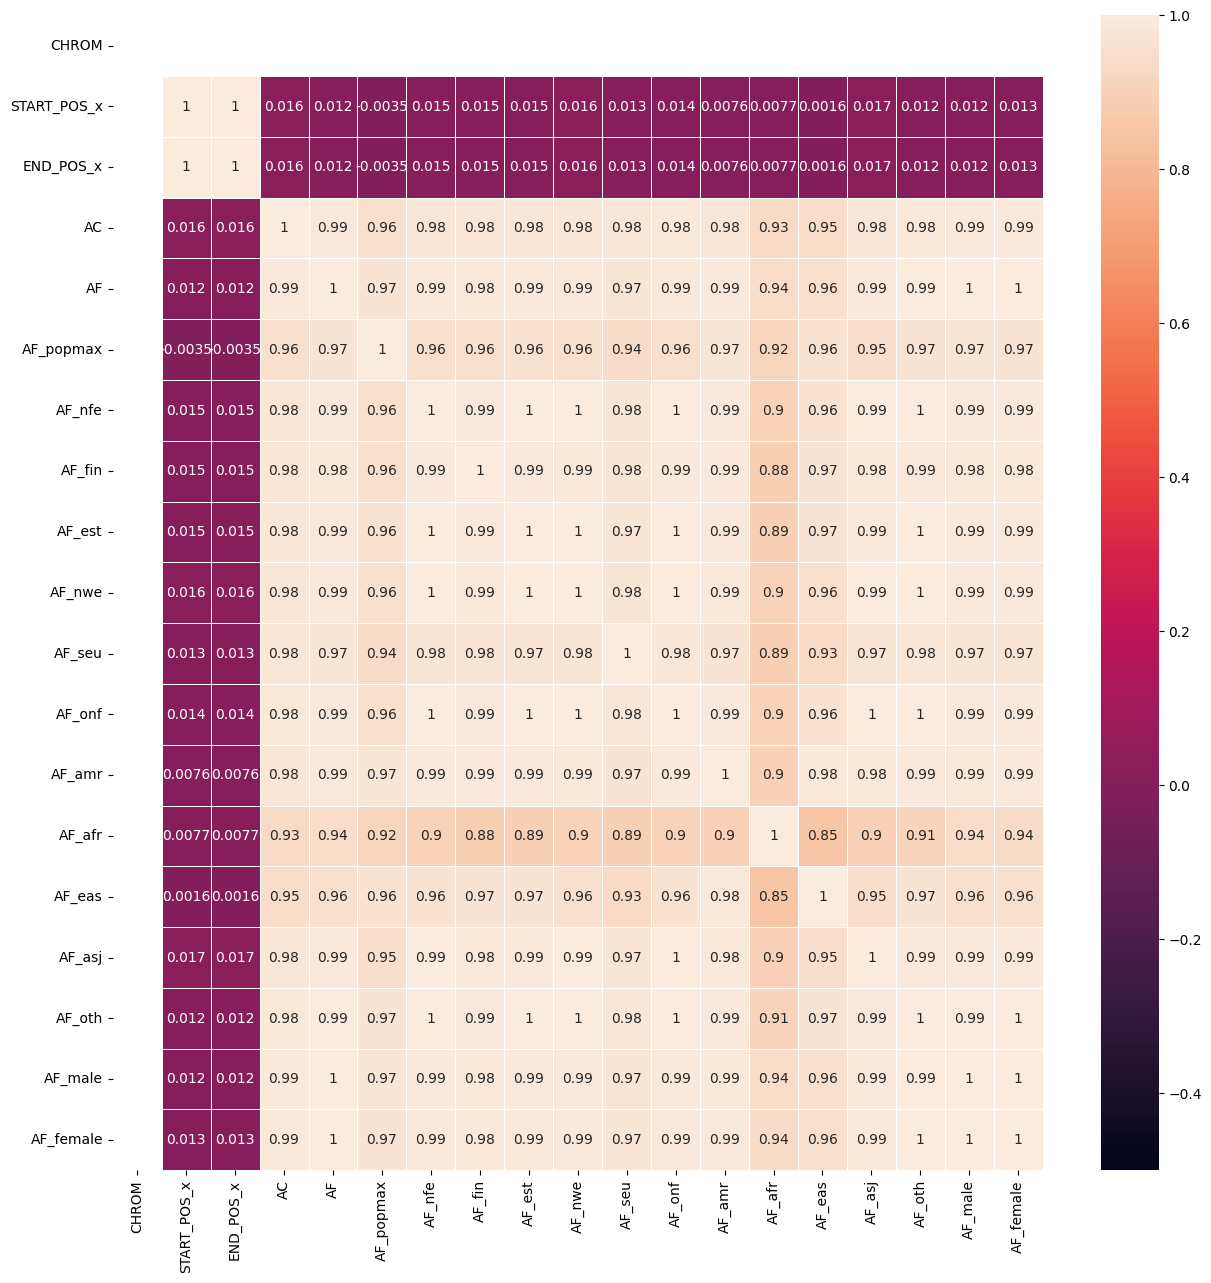

In [25]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(crb1_variants.corr(numeric_only=True), annot=True,
            linewidths=.5, ax=ax, vmin=-.5, vmax=1)

In [35]:
sns.pairplot(crb1_variants['START_POS_x'], hue=crb1_variants['popmax'])
#sns.pairplot(crb1_variants["START_POS_x", "AF", "AF_nfe", "AF_afr"], hue="popmax");

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

# UniProt

In [ ]:
import requests
import pandas as pd

In [ ]:
#!pip install SPARQLWrapper

In [ ]:
#from SPARQLWrapper import SPARQLWrapper, JSON

# Set the SPARQL endpoint (UniProt)
#sparql = SPARQLWrapper("https://sparql.uniprot.org/sparql")

# Define the query
#sparql.setQuery("""
#PREFIX up: <http://purl.uniprot.org/core/> 
#SELECT ?protein
#WHERE {
#  ?protein a up:Protein .
#}

""")

# Set the output format as JSON
sparql.setReturnFormat(JSON)

# Run the SPARQL query and convert to the defined format
#results = sparql.query().convert()

# Print the query result
#for result in results["results"]["bindings"]:
#    print(result["protein"]["value"])